In [1]:
import hkvwaporpy as hkv
import requests
import gdal
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### Metadata request for available products

In [2]:
# request the catalogus
df = hkv.read_wapor.get_catalogus()
df.head()

,additionalInfo,caption,code,dataType,description,hidden,index,links,operation,tags,workspaceCode
0,"{'format': 'Raster Dataset', 'unit': 'kg/m³ is...",Gross Biomass Water Productivity,L1_GBWP_A,RASTER,The annual Gross Biomass Water Productivity ex...,False,101,"[{'rel': 'self', 'href': 'https://io.apps.fao....","{'pixelTimeSeries': True, 'areaStatsTimeSeries...","[{'name': 'L1', 'index': 1, 'context': 'LEVELS...",WAPOR
1,"{'format': 'Raster Dataset', 'unit': 'kg/m³ is...",Net Biomass Water Productivity,L1_NBWP_A,RASTER,The annual Net Biomass Water Productivity expr...,False,102,"[{'rel': 'self', 'href': 'https://io.apps.fao....","{'pixelTimeSeries': True, 'areaStatsTimeSeries...","[{'name': 'L1', 'index': 2, 'context': 'LEVELS...",WAPOR
2,"{'format': 'Raster Dataset', 'unit': 'mm', 'da...",Actual EvapoTranspiration and Interception (An...,L1_AETI_A,RASTER,The actual EvapoTranspiration and Interceptio...,False,103,"[{'rel': 'self', 'href': 'https://io.apps.fao....","{'pixelTimeSeries': True, 'areaStatsTimeSeries...","[{'name': 'L1', 'index': 3, 'context': 'LEVELS...",WAPOR
3,"{'format': 'Raster Dataset', 'unit': 'mm', 'da...",Actual EvapoTranspiration and Interception (De...,L1_AETI_D,RASTER,The actual EvapoTranspiration and Interception...,False,104,"[{'rel': 'self', 'href': 'https://io.apps.fao....","{'pixelTimeSeries': True, 'areaStatsTimeSeries...","[{'name': 'L1', 'index': 4, 'context': 'LEVELS...",WAPOR
4,"{'format': 'Raster Dataset', 'unit': 'mm', 'da...",Transpiration (Annual),L1_T_A,RASTER,The Transpiration (T) data component is the ac...,False,105,"[{'rel': 'self', 'href': 'https://io.apps.fao....","{'pixelTimeSeries': True, 'areaStatsTimeSeries...","[{'name': 'L1', 'index': 5, 'context': 'LEVELS...",WAPOR


#### show all codes

In [3]:
df[['caption','code']]

,caption,code
0,Gross Biomass Water Productivity,L1_GBWP_A
1,Net Biomass Water Productivity,L1_NBWP_A
2,Actual EvapoTranspiration and Interception (An...,L1_AETI_A
3,Actual EvapoTranspiration and Interception (De...,L1_AETI_D
4,Transpiration (Annual),L1_T_A
5,Evaporation (Annual),L1_E_A
6,Interception (Annual),L1_I_A
7,Transpiration (Dekadal),L1_T_D
8,Evaporation (Dekadal),L1_E_D
9,Interception (Dekadal),L1_I_D


#### get the locations (countries and bassins) for which data products are available

In [4]:
df_locations = hkv.read_wapor.get_locations()
df_locations.head()

,name,code,type,bbox,L1,L2,L3
0,Awash,7010,BASIN,"[37.9583333333327, 7.89583333333234, 43.320833...",False,True,False
1,Jordan,6006,BASIN,"[34.4249999999993, 29.4624999999998, 36.799999...",False,True,False
2,Litani,6002,BASIN,"[35.2291666666659, 33.0999999999998, 36.399999...",False,True,False
3,Niger,7002,BASIN,"[-11.5874999999999, 4.27083333333253, 15.85833...",False,True,False
4,Nile,7003,BASIN,"[23.4458333333329, -4.0291666666674, 39.808333...",False,True,False


#### select product / code of interest

In [5]:
ds_code = 'L1_AETI_D'

#### get additional info of the dataset given a code and catalogus

In [6]:
cube_info = hkv.read_wapor.get_info_cube(cube_code=ds_code)
cube_info

,L1_AETI_D
format,Raster Dataset
unit,mm
dataType,Int16 (16bit Unsigned Integer)
conversionFactor,the pixel value in the downloaded data must be...
noDataValue,-9999
spatialResolution,250m (0.00223 degree)
spatialExtent,Africa and Near East
spatialReferenceSystem,EPSG:4326 - WGS84 - Geographic Coordinate Syst...
temporalResolution,from January 2009 to present
temporalExtent,Dekadal (approximately every 10 days)


In [7]:
# show the dimensions
cube_info.loc['dimensions',ds_code]

code,DEKAD
caption,Dekad (10-Days period)
code,DEKAD
description,Each month is splitted in 3 10-Days periods: f...
hierarchical,False
links,"[{'rel': 'self', 'href': 'https://io.apps.fao...."
timeSubtype,10-DAYS
type,TIME
workspaceCode,WAPOR
season,NaN
stage,NaN


In [8]:
# show the measures
cube_info.loc['measures',ds_code]

code,WATER_MM
caption,Amount of Water
code,WATER_MM
description,Amount of water expressed in mm which can be c...
links,"[{'rel': 'self', 'href': 'https://io.apps.fao...."
multiplier,0.1
scale,3
unit,mm
workspaceCode,WAPOR


#### get the data availability of the product within a set time_range

In [9]:
df_avail = hkv.read_wapor.get_data_availability(
    cube_info = cube_info, 
    time_range = '[2001-11-01, 2018-08-01]'
)
df_avail.head()

data_avail_period: DEKAD


,start_dekad,end_dekad,raster_id,bbox_srid,bbox_value
year,,,,,
2009,0101,0110,L1_AETI_0901,EPSG:4326,"[-30.0044643, -40.0044644, 65.0044644, 40.0044..."
2009,0111,0120,L1_AETI_0902,EPSG:4326,"[-30.0044643, -40.0044644, 65.0044644, 40.0044..."
2009,0121,0131,L1_AETI_0903,EPSG:4326,"[-30.0044643, -40.0044644, 65.0044644, 40.0044..."
2009,0201,0210,L1_AETI_0904,EPSG:4326,"[-30.0044643, -40.0044644, 65.0044644, 40.0044..."
2009,0211,0220,L1_AETI_0905,EPSG:4326,"[-30.0044643, -40.0044644, 65.0044644, 40.0044..."


In [10]:
i=0
cube_period = df_avail.iloc[i]
raster_id = cube_period['raster_id']
print(raster_id)

L1_AETI_0901


#### get the coverage url for Level 1 data, where the product can be obtained. Remember that this requires a WaPOR API Token. This can be obtained from your profile page at the https://wapor.apps.fao.org/profile (WaPOR 2.0)

In [11]:
#APIToken generated from WaPOR portal
MY_API_TOKEN = 'dd7ef4961752980c7d0ea0f388d03bb63dbe6e4edb6faf44d39d9aad7be5431b6c84b8923857b57e' 

In [12]:
cov_object = hkv.read_wapor.get_coverage_url(
    APItoken=MY_API_TOKEN,
    raster_id=raster_id,
    cube_code=ds_code)
cov_object

{'expiry_datetime': datetime.datetime(2019, 6, 26, 22, 7, 47, 989394),
 'download_url': 'https://io.apps.fao.org/gismgr/download/58632fa1-157c-489e-a21b-5c65b77f6bc9/L1_AETI_0901.tif'}

#### The following is for Level 2 data

#### set a lococation type and location code to query a certain product

In [13]:
## L2 location
location = df_locations.iloc[25]
loc_type = location['type']
loc_code = location['code']
print(loc_type, loc_code, location['name'])

COUNTRY ETH Ethiopia


In [14]:
ds_code='L2_AETI_D'
cube_info=hkv.read_wapor.get_info_cube(cube_code=ds_code)
cube_info

,L2_AETI_D
format,Raster Dataset
unit,mm
dataType,Int16 (16bit Unsigned Integer)
conversionFactor,the pixel value in the downloaded data must be...
noDataValue,-9999
spatialResolution,100m (0.000992 degree)
spatialExtent,Africa and Near East
spatialReferenceSystem,EPSG:4326 - WGS84 - Geographic Coordinate Syst...
temporalResolution,from January 2009 to present
temporalExtent,Dekadal (approximately every 10 days)


In [15]:
df_avail = hkv.read_wapor.get_data_availability(
    cube_info=cube_info,
    time_range='[2008-01-01, 2018-12-31]'
)
df_avail.head()

data_avail_period: DEKAD


,start_dekad,end_dekad,raster_id,bbox_srid,bbox_value
year,,,,,
2009,0101,0110,L2_AETI_0901,EPSG:4326,"[-17.6800595, -26.9816468, 54.5500992, 38.3308..."
2009,0111,0120,L2_AETI_0902,EPSG:4326,"[-17.6800595, -26.9816468, 54.5500992, 38.3308..."
2009,0121,0131,L2_AETI_0903,EPSG:4326,"[-17.6800595, -26.9816468, 54.5500992, 38.3308..."
2009,0201,0210,L2_AETI_0904,EPSG:4326,"[-17.6800595, -26.9816468, 54.5500992, 38.3308..."
2009,0211,0220,L2_AETI_0905,EPSG:4326,"[-17.6800595, -26.9816468, 54.5500992, 38.3308..."


#### set the raster id of the product to query

In [16]:
i=0
cube_period = df_avail.iloc[i]
raster_id = cube_period['raster_id']
print(raster_id)

L2_AETI_0901


#### get the coverage URL

In [17]:
cov_object = hkv.read_wapor.get_coverage_url(
    APItoken=MY_API_TOKEN,
    raster_id=raster_id,
    cube_code=ds_code,
    loc_type=loc_type,
    loc_code=loc_code
    )
cov_object

{'expiry_datetime': datetime.datetime(2019, 6, 26, 22, 7, 55, 86394),
 'download_url': 'https://io.apps.fao.org/gismgr/download/f4747c11-d3a6-4db1-ab3b-34865527551c/L2_AETI_0901_ETH.tif'}

#### Please download carefully, all L1 products are at least 1 GigaByte for each coverage product. Here we download a L2 product

In [18]:
filename='{}.tif'.format(raster_id)

#download raster file
resp = requests.get(cov_object['download_url'])
open(filename,'wb').write(resp.content)
print(filename)

L2_AETI_0901.tif


#### plot the result using matplotlib

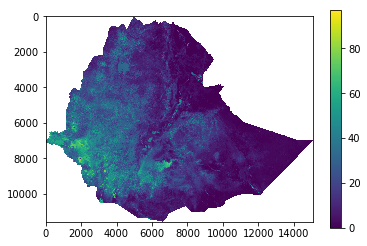

In [19]:
dataset = gdal.Open(filename)
band = dataset.GetRasterBand(1)
NDV=band.GetNoDataValue()
# Open as array
array=dataset.ReadAsArray()
array = np.ma.masked_equal(array, NDV)

im = plt.imshow(array)
plt.colorbar(im)
plt.show()

#### example of batch download

In [20]:
# ### loop over df_avail to download all raster available in data cube
# for i in range(len(df_avail)):
#     cube_period = df_avail.iloc[i]
#     raster_id = cube_period['raster_id']
#     cov_object = hkv.read_wapor.get_coverage_url(
#         APItoken=MY_API_TOKEN,
#         raster_id = raster_id,
#         cube_code = ds_code,
#         loc_type = loc_type,
#         loc_code = loc_code)
#     print(cov_object['download_url'])
#     if cov_object['expiry_datetime'] > datetime.datetime.now():
#         # url still valid
#         resp = requests.get(cov_object['download_url'])
#         open(output_folder+'/{0}.tif'.format(raster_id),'wb').write(resp.content)   